# Abijeet Dhillon

# Research question/interests

With this project, I hope to determine which countries produce the highest percentage of their energy via coal when compared to that country's overall energy mix and which countries produce the lowest percentage of their energy via coal when compared to that country's overall energy mix? I am interested in this dataset since it describes the shift, or lack of, countries have undergone to adjust their means of producing energy to become more environmentally conscious (more specifically shifting away from coal). A specific question I have is which country has made the largest reduction in their usage of coal to produce energy. Lastly, I want to look at the most energy producing via coal countries in 1990 and see if they're the same in 2018. I could imagine myself building a user friendly dashboard with this dataset since there is a lot of useful and up-to-date data in this dataset.

# Milestone 3 Task 1:

In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Description of the dataset:
This data was provided by [Our World in Data](https://ourworldindata.org/), a non-profit organization that focuses on the large problems around the world.
Our dataset includes data on each countries energy consumption, energy mix, electricity mix, and related metrics for the past decades.
Our data was collected from 1965 to 2021.
The purpose of our dataset is to help show the public that our world lacks efficient, clean, and inexpensive alternatives to fossil fuels.
Our data was collected by a team of researchers who used numerous different datasets from multiple countries and compiled them together into a comprehensive dataset.

## Loading the dataset

In [2]:
df = pd.read_csv('../data/raw/owid-energy-data.csv')

## Exploring the Dataset
- Interesting/Relevant Columns Include:

In [3]:
relevant_columns_df = pd.read_csv("https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-codebook.csv")
relevant_columns_df.loc[relevant_columns_df["column"].str.contains("coal_")]
# # Print the relevant columns into a form which will be easy to keep them in the dataframe
# for column in relevant_columns_df["column"]:
#     print(f"'{column}', ")

,column,description,source
14,coal_cons_change_pct,Annual percentage change in coal consumption,Calculated by Our World in Data based on BP St...
15,coal_cons_change_twh,"Annual change in coal consumption, measured in...",Calculated by Our World in Data based on BP St...
16,coal_cons_per_capita,Per capita primary energy consumption from coa...,Calculated by Our World in Data based on BP St...
17,coal_consumption,"Primary energy consumption from coal, measured...",Calculated by Our World in Data based on BP St...
18,coal_elec_per_capita,"Per capita electricity generation from coal, m...",Calculated by Our World in Data based on BP St...
19,coal_electricity,"Electricity generation from coal, measured in ...",Calculated by Our World in Data based on BP St...
20,coal_prod_change_pct,Annual percentage change in coal production,Calculated by Our World in Data based on BP St...
21,coal_prod_change_twh,"Annual change in coal production, measured in ...",Calculated by Our World in Data based on BP St...
22,coal_prod_per_capita,"Per capita coal production, measured in kilowa...",Calculated by Our World in Data based on BP St...
23,coal_production,"Coal production, measured in terawatt-hours",Calculated by Our World in Data based on BP St...


## Initial Thoughts
Nothing is really surprising about this dataset, it is very thorough and contains all of the information pertaining to my research questions.

I think I will lean towards an EDA using some of the columns listed above since they all are relevant towards my research questions.

## Data Wrangling
To wrangle this data, I will only keep the columns which were listed above.

In [4]:
# Creating a new dataframe from the old one which only contains the columns mentioned above
df = df[['country', 'year', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy']]
df

,country,year,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy
0,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN
1,Afghanistan,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
2,Afghanistan,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
3,Afghanistan,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
4,Afghanistan,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22338,Zimbabwe,2017,NaN,NaN,NaN,NaN,212.129,3.02,8.375,1.697,1542.302,21.957,41.313,NaN
22339,Zimbabwe,2018,NaN,NaN,NaN,NaN,255.561,3.69,14.336,3.148,1738.714,25.105,40.416,NaN
22340,Zimbabwe,2019,NaN,NaN,NaN,NaN,247.175,3.62,-21.529,-5.405,1345.127,19.700,32.007,NaN
22341,Zimbabwe,2020,NaN,NaN,NaN,NaN,231.448,3.44,3.004,0.592,1365.268,20.292,30.963,NaN


Now, we will clean this data by removing NaN entries and sorting them by year.

In [5]:
# Creating another new data frame from the old one which drops all NaN entries
df_dropna = df.dropna()
cleaned_df = df_dropna
cleaned_df.sort_values('year', ascending = True)
cleaned_df_1990 = cleaned_df.loc[cleaned_df["year"] == 1990]
cleaned_df_2018 = cleaned_df.loc[cleaned_df["year"] == 2018]
# cleaned_df_1990
# cleaned_df_2018
# cleaned_df

## Research Questions
- Research Question 1)
    - Which countries produce the highest percentage of their energy via coal when compared to that country's overall energy mix?
- Research Question 2)
    - Which countries produce the lowest percentage of their energy via coal when compared to that country's overall energy mix?
- Research Question 3)
    - Which country has made the largest reduction in their usage of coal to produce energy?
- Research Question 4) 
    - Has the same country dominated the coal energy production from 1990 to 2018?


## Data Analysis & Visualizations
In order to visualize this data, I will produce graphs based around the research questions listed above.

Text(0.5, 1.0, 'Percentage of Electricity Generation via Coal (1990)')

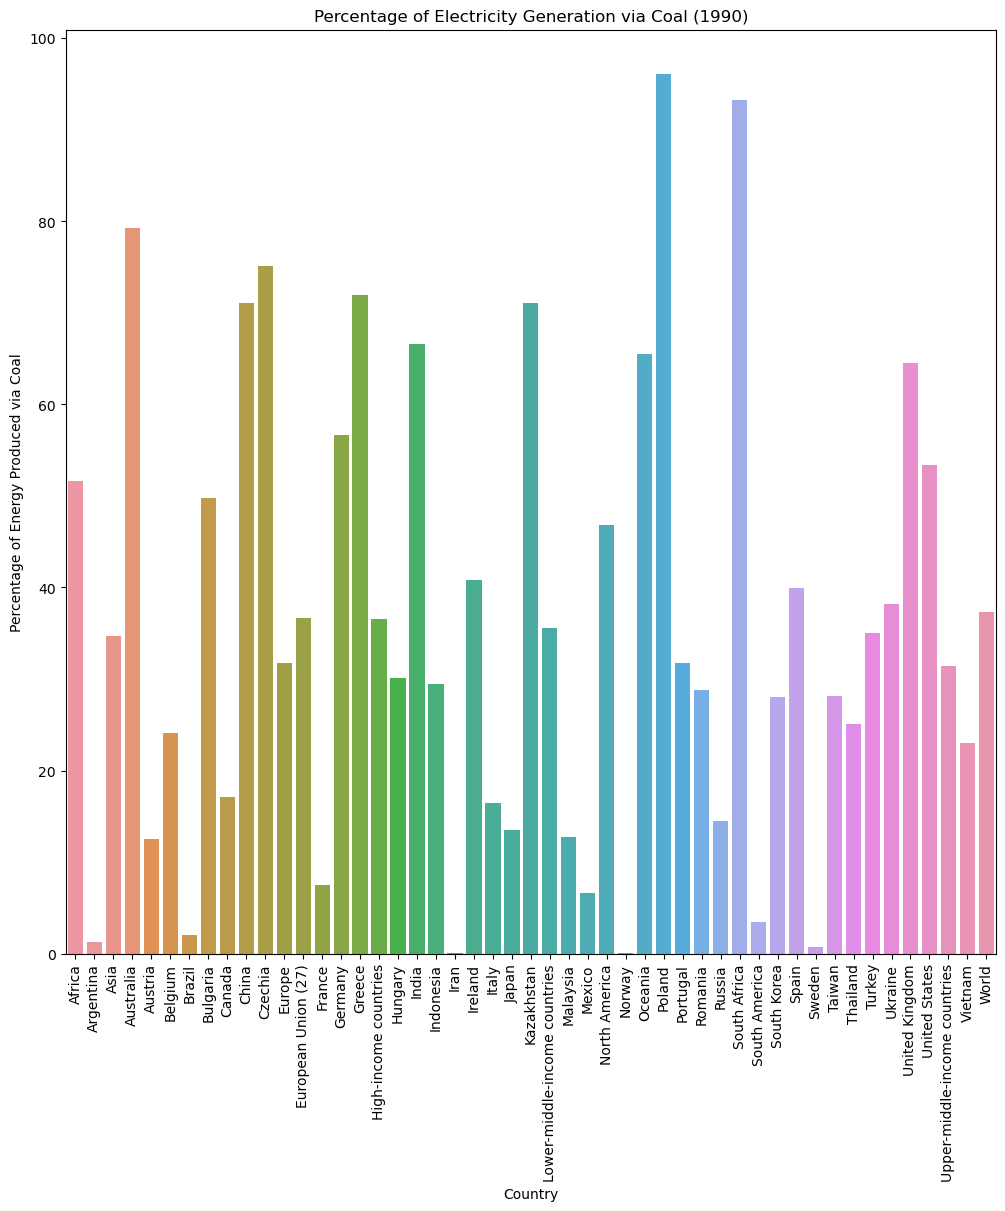

In [6]:
plt.figure(figsize=(12, 12))
sns.barplot(x='country', y='coal_share_elec', data=cleaned_df_1990)
plt.ylabel('Percentage of Energy Produced via Coal')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Percentage of Electricity Generation via Coal (1990)')

Above is a graph which represents the electricity a country generated from coal in 1990 compared to its' overall energy mix.

Text(0.5, 1.0, 'Percentage of Electricity Generation via Coal (2018)')

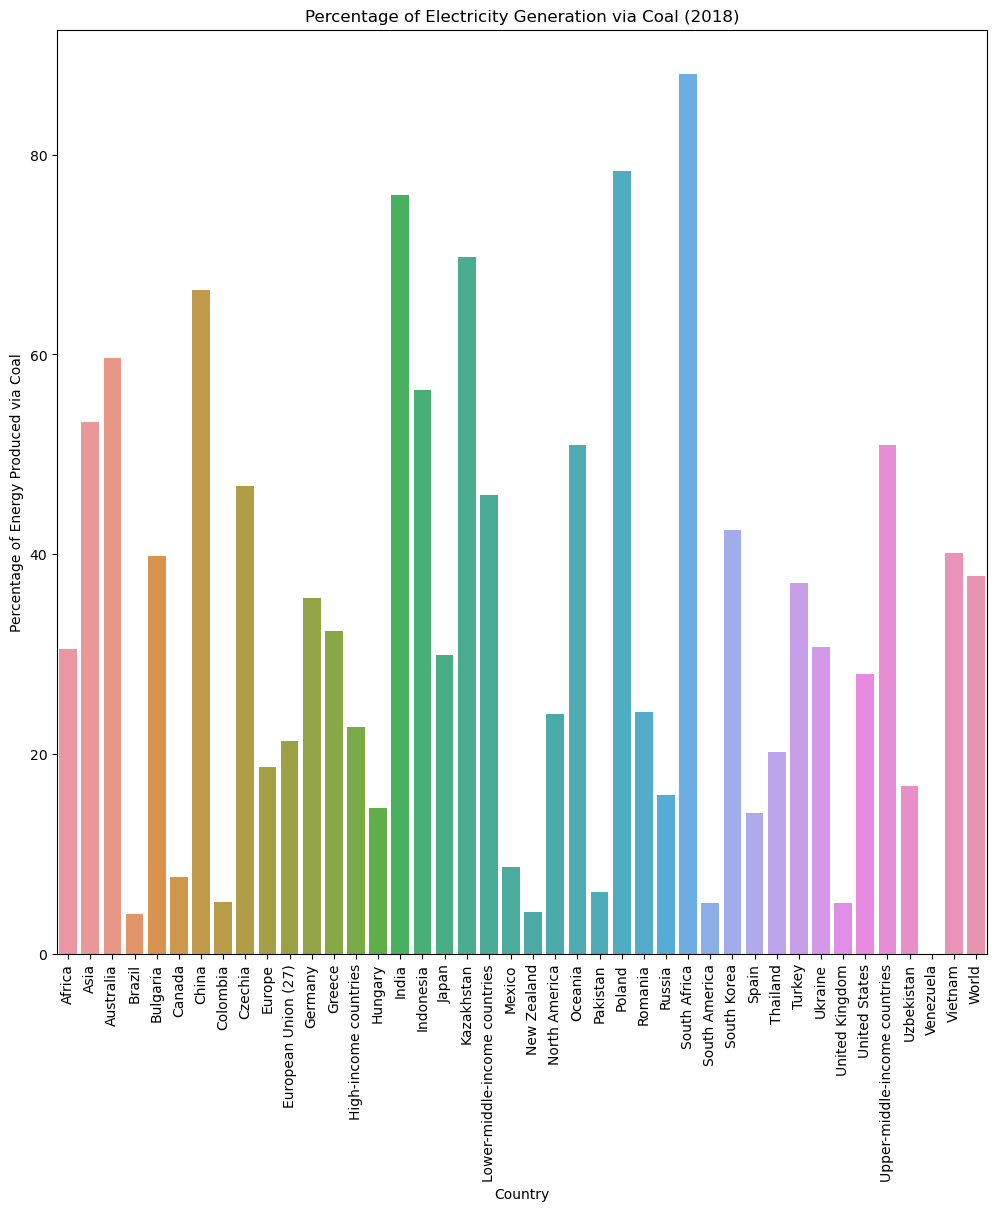

In [7]:
plt.figure(figsize=(12, 12))
sns.barplot(x='country', y='coal_share_elec', data=cleaned_df_2018)
plt.ylabel('Percentage of Energy Produced via Coal')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Percentage of Electricity Generation via Coal (2018)')

Above is a graph which represents the electricity a country generated from coal in 2018 compared to its' overall energy mix.

Text(0.5, 1.0, 'Electricity Generation via Coal (1990)')

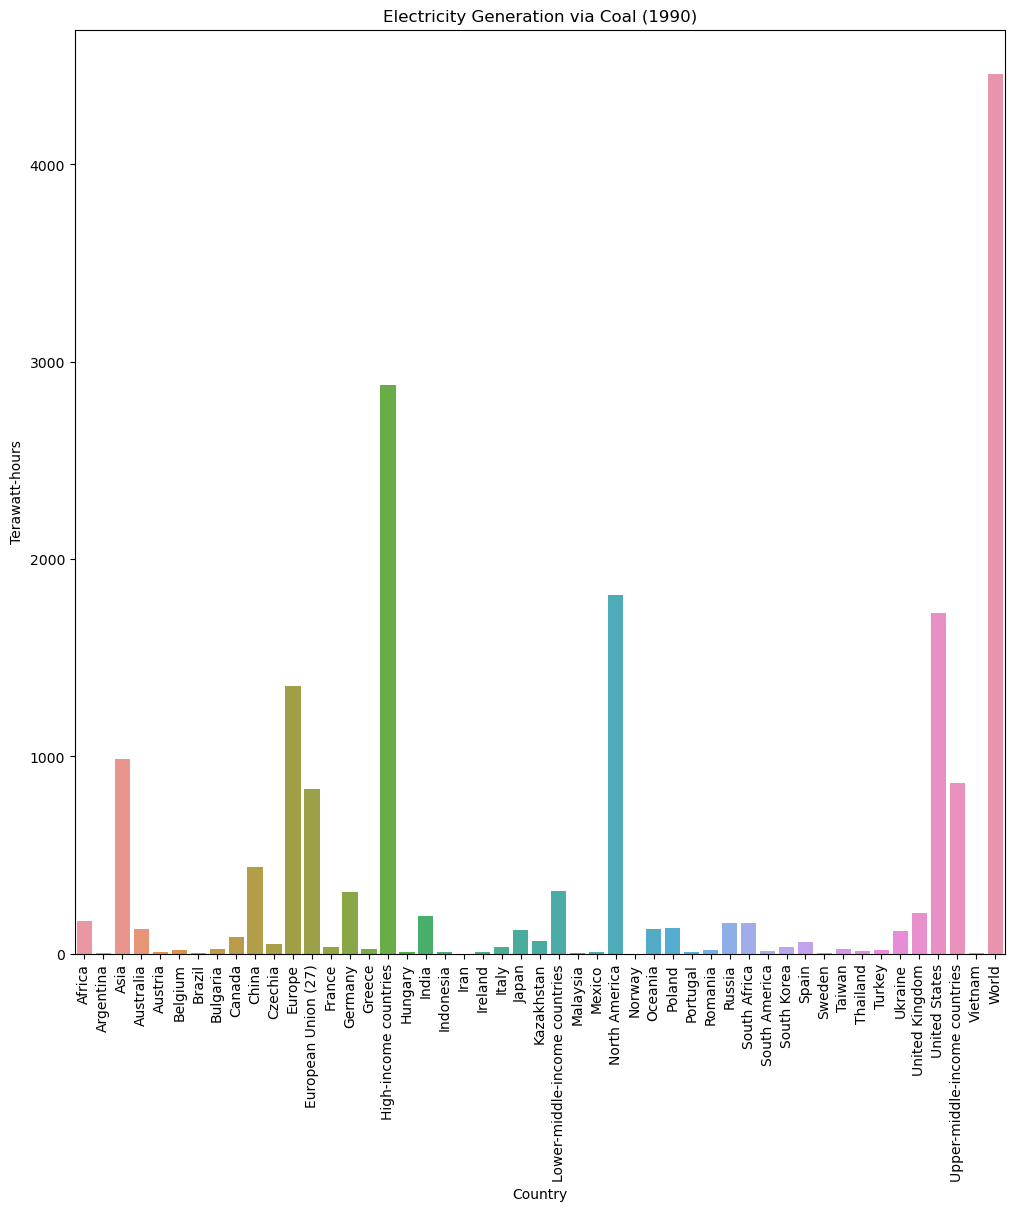

In [8]:
plt.figure(figsize=(12, 12))
sns.barplot(x='country', y='coal_electricity', data=cleaned_df_1990)
plt.ylabel('Terawatt-hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Electricity Generation via Coal (1990)')

Above is a graph which represents the electricity a country generated from coal in 1990 in terawatt-hours.

Text(0.5, 1.0, 'Electricity Generation via Coal (2018)')

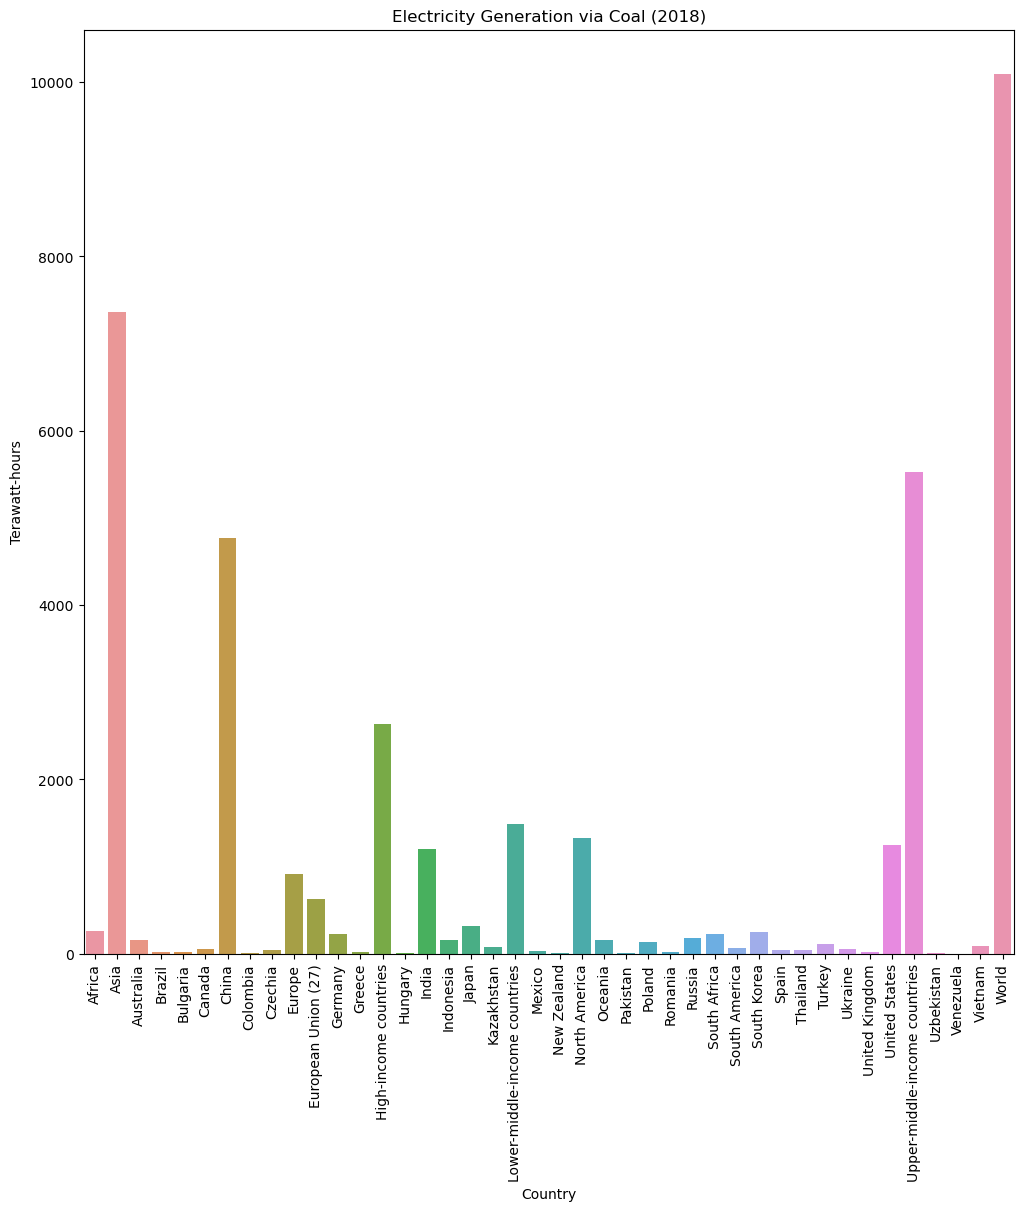

In [9]:
plt.figure(figsize=(12, 12))
sns.barplot(x='country', y='coal_electricity', data=cleaned_df_2018)
plt.ylabel('Terawatt-hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Electricity Generation via Coal (2018)')

Above is a graph which represents the electricity a country generated from coal in 2018  in terawatt-hours. 

Text(0.5, 1.0, 'Annual Change in Coal Production')

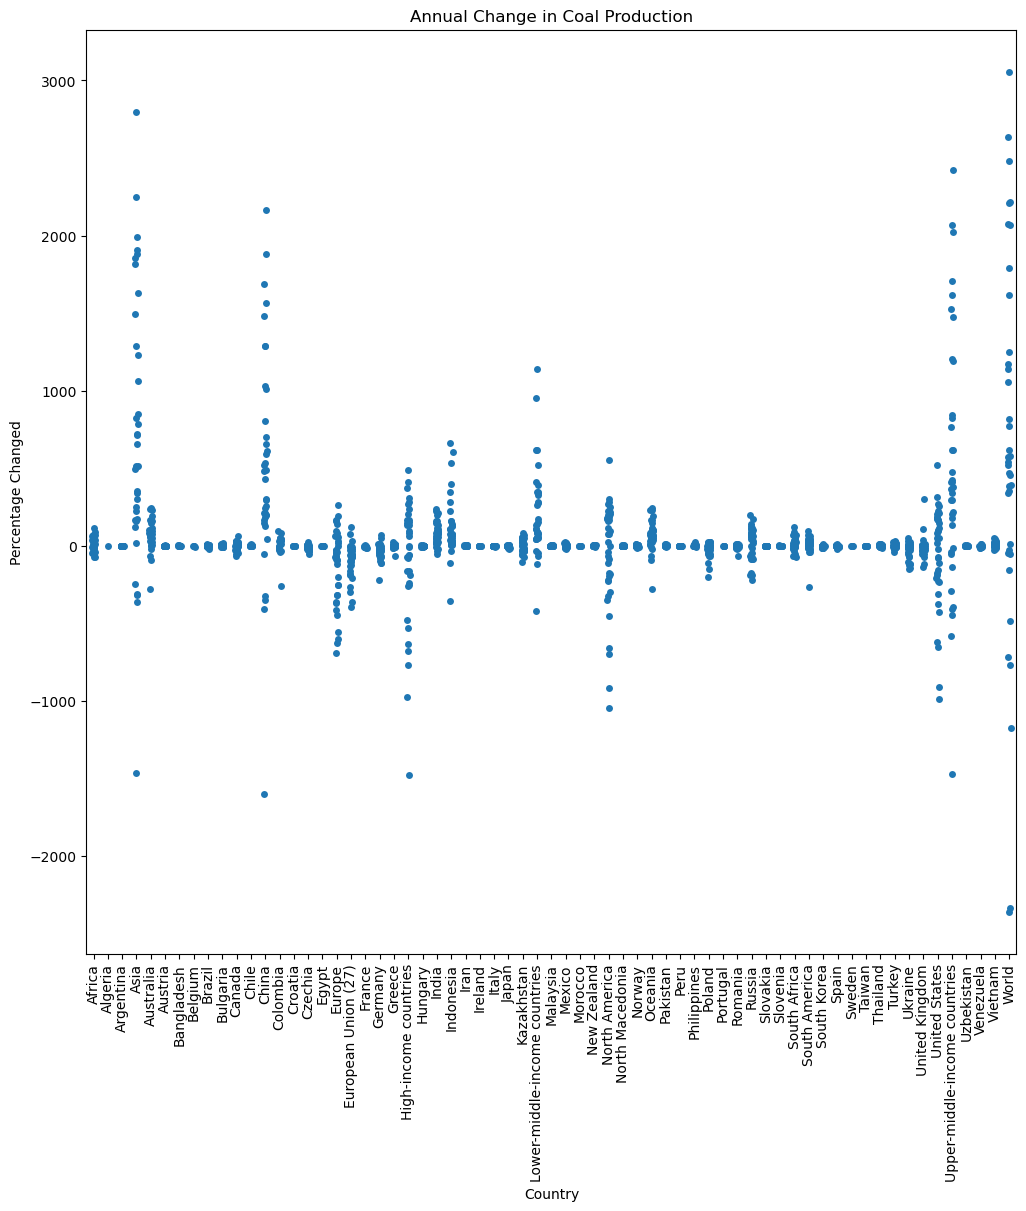

In [10]:
plt.figure(figsize=(12, 12))
sns.stripplot(x='country', y='coal_prod_change_twh', data=cleaned_df)
plt.ylabel('Percentage Changed')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Annual Change in Coal Production')

Above is a strip plot which represents the annual change in coal production in Terawatt-hours compared to the year before for each year.

Text(0.5, 1.0, 'Annual Change in Coal Consumption')

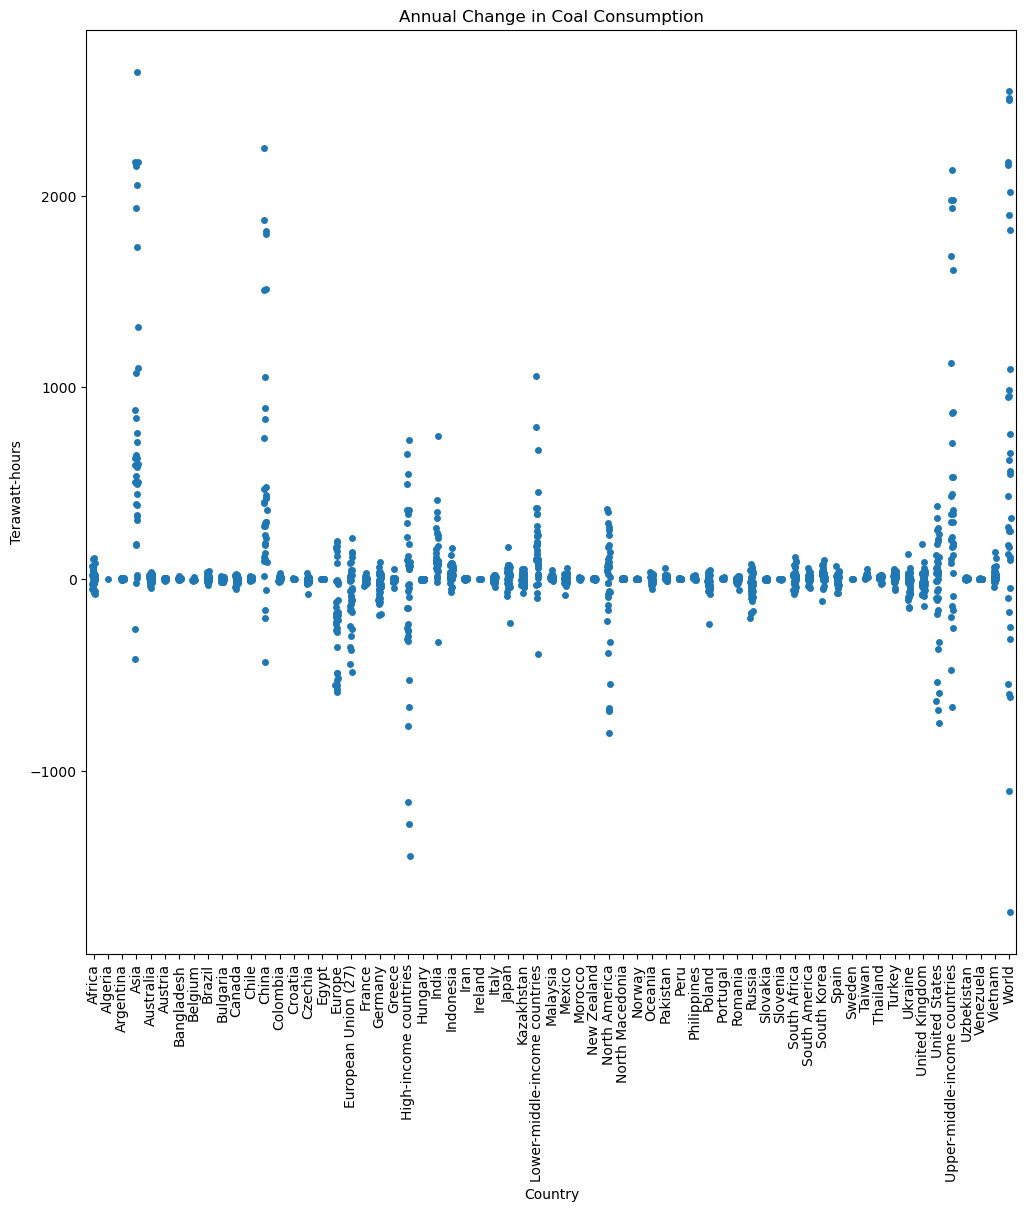

In [11]:
plt.figure(figsize=(12, 12))
sns.stripplot(x='country', y='coal_cons_change_twh', data=cleaned_df)
plt.ylabel('Terawatt-hours')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.title('Annual Change in Coal Consumption')

Above is a strip plot which represents the annual change in coal consumption in Terawatt-hours compared to the year before for each year.

# Milestone 3 Task 2:

## Analysis Pipeline

### Load Data

In [12]:
# df = pd.read_csv('../data/raw/owid-energy-data.csv')

### Clean, Process, and Wrangle Data

In [13]:
# Keep only the needed columns
# df = df[['country', 'year', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy']]
# df_dropna = df.dropna()
# cleaned_df = df_dropna
# cleaned_df.sort_values('year', ascending = True)
# cleaned_df_1990 = cleaned_df.loc[cleaned_df["year"] == 1990]
# cleaned_df_2018 = cleaned_df.loc[cleaned_df["year"] == 2018]

The data is in optimal format to use, therefore I don't need to process/wrangle it as much.

# Milestone 3 Task 3:

## Method Chaining and Writing Python Functions

In [14]:
# # Function to load data
# def load_data(path):
#     raw_data = pd.read_csv(path)
#     return raw_data;

# # Function to only keep the necessary columns and remove NaN cells
# def clean_data(dataframe):
#     cleaned_df = dataframe[['country', 'year', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy']]
#     cleaned_df = cleaned_df.dropna()
#     return cleaned_df

# # Function to create a data frame for 1990 values
# def data_1990(path):
#     df = load_data(path)
#     df = clean_data(path)
#     df = df.loc[df["year"] == 1990]
#     return df

# # Function to create a data frame for 2018 values
# def data_1990(path):
#     df = load_data(path)
#     df = clean_data(path)
#     df = df.loc[df["year"] == 2018]
#     return df


# # Function that wraps together the method chains
# def load_and_process(path):
#     # Method Chain 1
#     df1 = (
#         pd.read_csv(path)[['country', 'year', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy']]
#         .dropna()
#     )
#     # Method Chain 2
#     df2 = (
#         df1
#         .rename(columns={'year' : 'Year', 'country' : 'Country'})
#         .rename(columns={'coal_cons_change_pct' : 'Annual percentage change in coal consumption', 'coal_cons_change_twh' : 'Annual change in coal consumption, measured in terawatt-hours'})
#         .rename(columns={'coal_cons_per_capita' : 'Per capita primary energy consumption from coal, measured in kilowatt-hours', 'coal_consumption' : 'Primary energy consumption from coal, measured in terawatt-hours'})
#         .rename(columns={'coal_elec_per_capita' : 'Per capita electricity generation from coal, measured in kilowatt-hours', 'coal_electricity' : 'Electricity generation from coal, measured in terawatt-hours	'})
#         .rename(columns={'coal_prod_change_pct' : 'Annual percentage change in coal production', 'coal_prod_change_twh' : 'Annual change in coal production, measured in terawatt-hours'})
#         .rename(columns={'coal_prod_per_capita' : 'Per capita coal production, measured in kilowatt-hours', 'coal_production' : 'Coal production, measured in terawatt-hours'})
#         .rename(columns={'coal_share_elec' : 'Share of electricity generation that comes from coal', 'coal_share_energy' : 'Share of primary energy consumption that comes from coal'})
#         .sort_values('Year', ascending = True)
#     )
#     return df2
    
# df6 = load_and_process("../data/raw/owid-energy-data.csv")
# df6

All the code above has been moved into project_functions2.py.

In [15]:
import project_functions2

dfTest = project_functions2.load_and_process("../data/raw/owid-energy-data.csv")
dfTest

,Country,Year,Annual percentage change in coal consumption,"Annual change in coal consumption, measured in terawatt-hours","Per capita primary energy consumption from coal, measured in kilowatt-hours","Primary energy consumption from coal, measured in terawatt-hours","Per capita electricity generation from coal, measured in kilowatt-hours","Electricity generation from coal, measured in terawatt-hours\t",Annual percentage change in coal production,"Annual change in coal production, measured in terawatt-hours","Per capita coal production, measured in kilowatt-hours","Coal production, measured in terawatt-hours",Share of electricity generation that comes from coal,Share of primary energy consumption that comes from coal
206,Africa,1985,3.181,24.268,1434.795,787.166,254.298,139.514,6.244,70.458,2185.296,1198.911,53.869,35.216
20176,Turkey,1985,19.701,22.841,2824.541,138.781,305.854,15.028,20.715,21.226,2517.449,123.692,43.917,35.945
7559,Germany,1985,-0.530,-9.246,22344.742,1735.999,4027.206,312.880,3.956,65.788,22249.711,1728.615,59.877,40.463
18142,South Africa,1985,2.694,19.037,22203.141,725.574,4143.441,135.403,6.439,70.182,35502.133,1160.170,94.363,79.336
19596,Thailand,1985,100.856,9.257,354.336,18.435,102.120,5.313,136.509,10.018,333.616,17.357,23.070,9.688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17208,Russia,2021,3.672,33.573,6495.749,947.808,1403.071,204.725,8.525,199.468,17402.211,2539.192,17.693,10.902
6516,Europe,2021,5.449,168.104,4343.854,3253.386,978.080,732.546,7.124,261.814,5256.547,3936.959,14.958,10.849
21293,Upper-middle-income countries,2021,4.235,1125.852,10787.517,27708.553,2367.386,6080.810,5.492,1524.977,11404.709,29293.859,49.141,40.327
8537,High-income countries,2021,8.601,650.332,6742.966,8211.176,1754.179,2136.134,5.406,410.169,6567.389,7997.369,18.509,12.053
